<a href="https://colab.research.google.com/github/anujcoder1234/Machine-Learning-Projects/blob/main/GlassProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (21.9 MB)




1) Explain the type of Naïve Bayes classifier you have applied and why, giving 
details of the model used, and the inputs and outputs.

The dataset contains features such as 
• RI: refractive index 
• Na: Sodium (percentage weight) 
• Mg: Magnesium (percentage weight)
• Al: Aluminum (percentage weight)
• Si: Silicon (percentage weight)
• K: Potassium (percentage weight)
• Ca: Calcium (percentage weight)
• Ba: Barium (percentage weight)
• Fe: Iron (percentage weight)

These features independentely decide which type of glass to use from 0-7. For this dataset I will use Gausian naive bayes model.


**Gausian Naive Bayes Formula**


The reason for using this model is  


*   Dataset is continuous with multi class labels
*   Input Features are not boolean type(binary variables) or we would use Bernoulli Naïve Bayes Classifier

* Input features are not categorical
*   Input features are not represented in multinomial naive bayes fashion like a given term represents the number of times it appears in a dataset.
*   The dataset consist  of input features which are continuous distribution, Which is how a Gausian naive bayes model works

# Gausian Naive Bayes model


 In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Normal distribution). It gives a bell-shaped curve when plotted, which is symmetric about the mean of the feature values as shown below:

 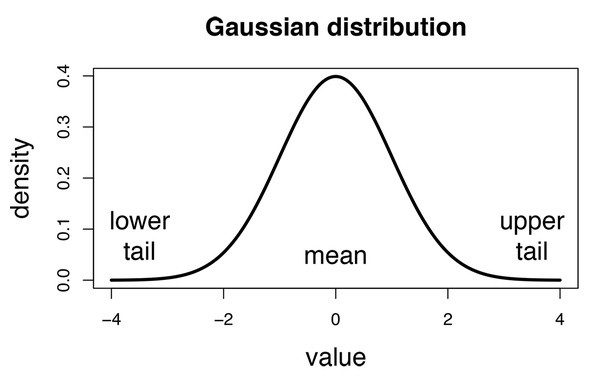

In this model the likelihood of features is assumed to be gausian. Hence conditional probability is given by

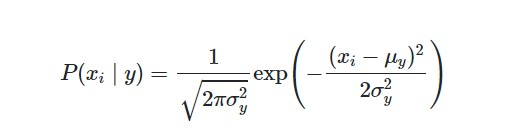


As the  feature contains numerical values instead of categories i.e. Gaussian distribution. We will use the distribution of the numerical variable to have a good guess of the frequencyand the gausian bayes model assumes normal or gausian distribution for numerical variables.
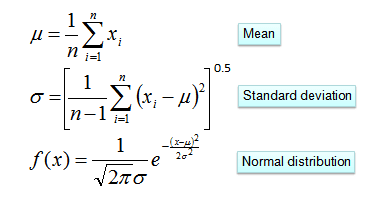
















**Gausian Naive Model**

In [8]:

import pandas_profiling as pdpf

In [9]:
import pandas as pd
import numpy as mp
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [10]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [11]:
data=pd.read_csv('Glass.csv')
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [111]:
x = data.drop(columns = 'Type')#creating x as inputs and y as outputs
y = data.Type

In [112]:
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size= .25, random_state=30)#creating test and train split

In [113]:
naive_bayes= GaussianNB()# using Gaussian Naive bayes model from sc-kit learn
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [114]:
y_pred=naive_bayes.predict(x_test)


In [115]:
y_pred.shape

(54,)

In [116]:
y_test.shape

(54,)

In [125]:
naive_bayes.score(x_test,y_test)#Metrics Score

0.46296296296296297

In [126]:
from sklearn.metrics import f1_score# F1 score
f1_score(y_test,y_pred, average='macro')

0.40631256256256254

In [137]:
pred = naive_bayes.predict(x_test)#ROC and Auc curve
pred_prob = naive_bayes.predict_proba(x_test)
Naive_bayes = roc_auc_score(y_test, pred_prob, multi_class='ovr')
Naive_bayes

0.8191739865613457

**Logistic** **Regression**

 

*   Dataset contains 0's we need 0s as the contribution of each feature decides the type of glass used even a feature can have a 0 contribution. we leave 0's as it is.

*  Dataset does not contain missing values.
*   There is a  correlation(multicollinearity) in the dataset. The feature values can show dependencies on each other as the type of glass is decided by the mixture of different features.Some features can be dependent or show similiarity to represent a particular type of glass.

*   There are not many Outliers as seen by the visualization using box plot. So we will leave the outliers as it is.




*   The dataset shows a imbalance nature. Large differences between maximum and minimum values in a some features. The model will find it difficult to  classify. Therefore we will use scalar function to normalize the dataset before splitting in train and test dataset.



In [19]:
scalar = StandardScaler()#Normalizing

x_scaled = scalar.fit_transform(x)

In [20]:
x_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [21]:
def vif_score(x):#Features show higher variance inflation factor
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [22]:
vif_score(x)

FEATURE   VIF_SCORE
0      RI    9.504579
1      Na   61.789643
2      Mg  207.841338
3      Al   25.682696
4      Si   58.176725
5       K   43.620777
6      Ca  211.427466
7      Ba   26.135301
8      Fe    1.218039

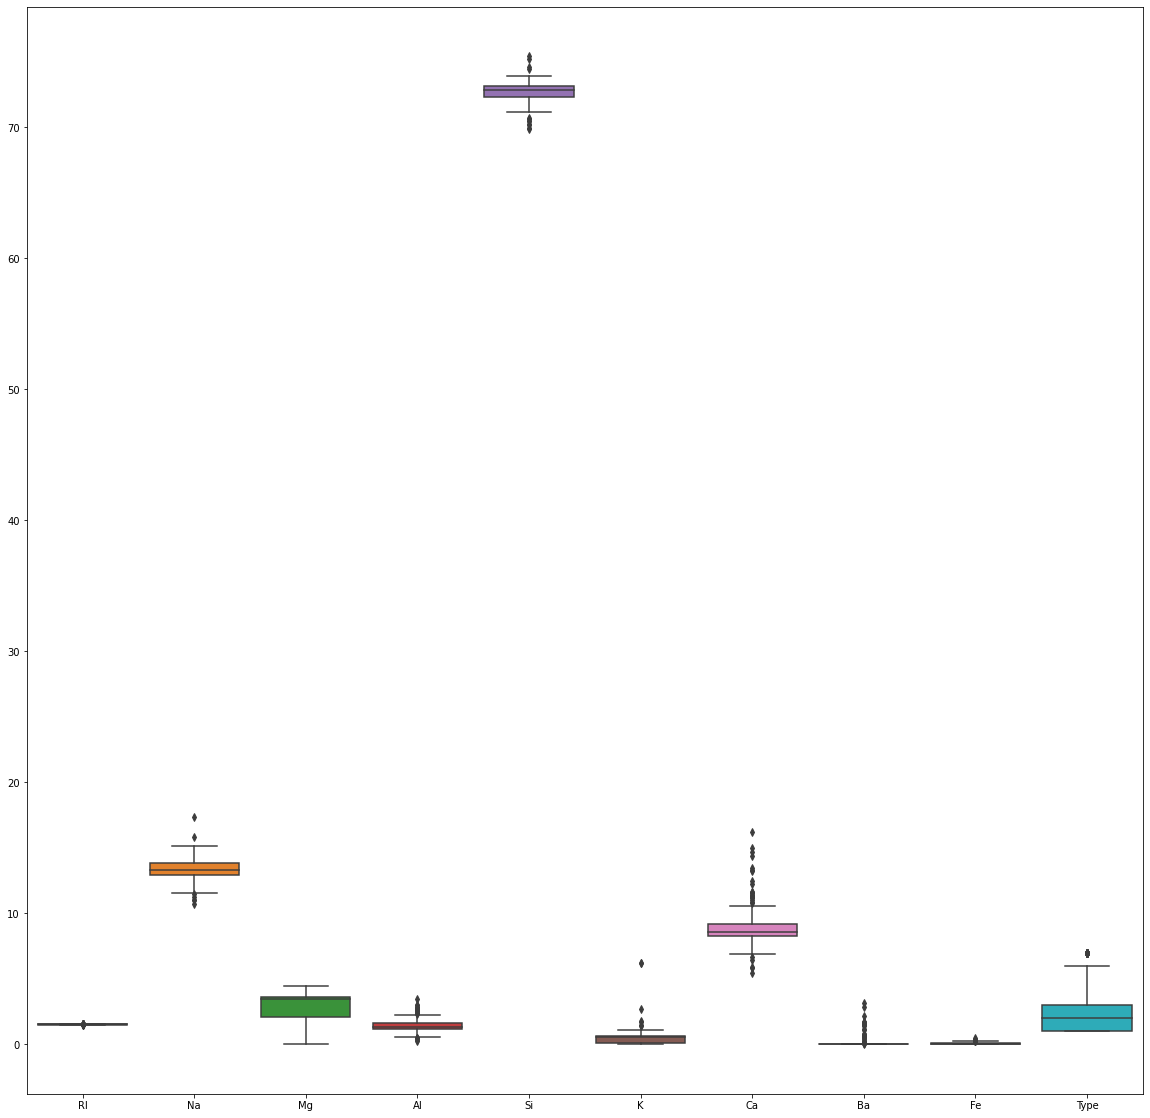

In [23]:
fig ,ax  = plt.subplots(figsize = (20,20))#not much outliers. we will ignore the outliers
sns.boxplot(data = data , ax = ax)

In [25]:
x

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size = .20 , random_state = 144)#splitting using scallar input

In [35]:
x_train[0]

array([ 0.04771977, -0.25512724,  0.65701535, -0.75267058,  0.23172971,
        0.11210651, -0.38523256, -0.17144576,  1.16232646])

In [127]:
linear= LogisticRegression(solver='lbfgs')#For multiclass problem we will use lbfgs

In [128]:
linear.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [86]:
linear.predict_proba([x_test[9]])

array([[0.41198387, 0.34883829, 0.11385361, 0.00631226, 0.05982396,
        0.059188  ]])

In [87]:
linear.predict([x_test[9]])

array([1])

In [88]:
y_test.iloc[9]#As we can see our model is predicting accurately with true class

1

In [89]:
linear.fit(x_train,y_train )



LogisticRegression()

In [90]:
linear.predict_log_proba([x_test[1]])#Predicting probabilities using Logit function

array([[-1.26167272e+01, -9.21789714e+00, -1.50251224e+01,
        -1.04345753e+01, -1.45843288e+01, -1.32732186e-04]])

In [46]:
type(y_test)

pandas.core.series.Series

In [48]:
y_pred_linear = linear.predict(x_test)

In [49]:
y_pred_linear

array([1, 7, 5, 1, 2, 2, 1, 2, 1, 1, 2, 7, 2, 1, 2, 2, 1, 1, 2, 7, 7, 2,
       2, 7, 5, 2, 2, 2, 1, 6, 2, 2, 2, 2, 2, 7, 2, 1, 1, 2, 6, 7, 2])

**Evaluating Metrics**

In [91]:
from sklearn.metrics import accuracy_score#accuracy score
accuracy_score(y_test,y_pred_linear)

0.6511627906976745

In [120]:
linear.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.12962962962962962

In [135]:
pred = linear.predict(x_test)#Computing Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
pred_prob_2 = linear.predict_proba(x_test)
LogisticRegression = roc_auc_score(y_test, pred_prob_2, multi_class='ovr')
LogisticRegression

0.800313940798922

In [50]:
confusion_matrix(y_test,y_pred_linear)#Confusion Matrix

array([[ 8,  5,  0,  0,  0,  0],
       [ 1, 12,  0,  0,  1,  0],
       [ 2,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  5]])

In [68]:
y_test

60     1
207    7
167    5
156    3
139    2
104    2
41     1
19     1
154    3
1      1
135    2
204    7
116    2
4      1
111    2
20     1
23     1
24     1
100    2
206    7
182    6
127    2
8      1
199    7
169    5
81     2
173    5
55     1
57     1
178    6
77     2
133    2
158    3
32     1
150    3
203    7
130    2
132    2
62     1
123    2
109    2
181    6
160    3
Name: Type, dtype: int64

In [66]:
cm = confusion_matrix(y_test, y_pred_linear)
cm

array([[ 8,  5,  0,  0,  0,  0],
       [ 1, 12,  0,  0,  1,  0],
       [ 2,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  5]])

In [69]:
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','5','6','7'],
                     columns = ['1','2','3','5','6','7'])




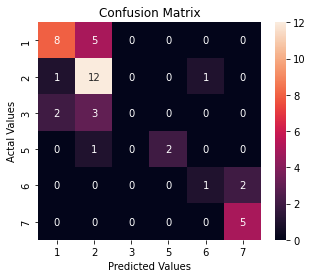

In [71]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

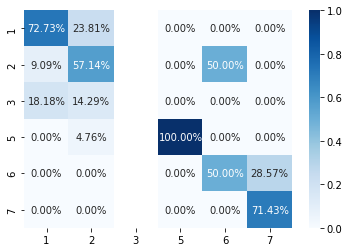

In [74]:
sns.heatmap(cm_df/np.sum(cm_df), annot=True, 
            fmt='.2%', cmap='Blues')

In [139]:
Naive_bayes#Roc_Auc metrics


0.8191739865613457

In [140]:
LogisticRegression#Roc_auc metrics

0.800313940798922